# 건강검진정보 데이터를 통한 성별 및 연령대 분류

1. import & Data Check
2. EDA
3. Feature Engineering 
4. Modeling

- train : 가입자일련번호 끝자리가 5가 아닌 데이터
- test : 가입자일년번호 끝자리가 5인 데이터(성별코드, 연령대코드 없앨 것)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
os.listdir('dataset/medical-checkup_2017')

['medical-checkup-2017.csv']

In [21]:
data = pd.read_csv('dataset/medical-checkup_2017/medical-checkup-2017.csv')

In [52]:
data 
# 100만 개의 데이터, 34개의 변수로 구성

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [23]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

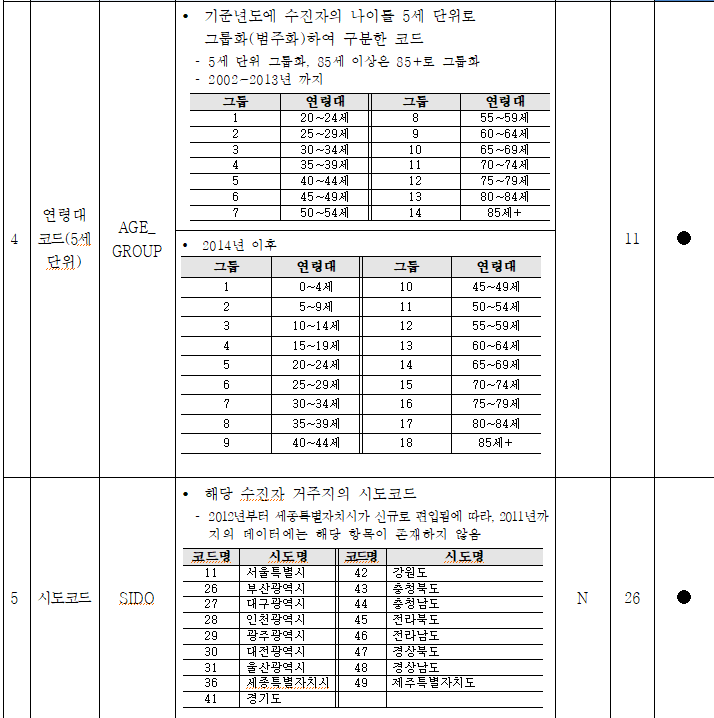

train과 test 데이터 분리하기 
1) 가입자 일련번호로 분리 수행
- 데이터 타입 수정
- 5로 안끝나면 train
- 5로 끝나면 test

train 데이터에 대해서만 수행
1) 연령대 데이터 10,20,30,40.. 으로 변경 처리
- 연도에 따라 다르게 수행할 것!


## 찐 데이터 data
## 분석할 데이터 df, df_train, df_test
## 야매 data1

In [53]:
# 가입자일련번호 데이터 타입 변환

df = data
df = df.astype({'가입자일련번호':'str'})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  object 
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [73]:
df_train = df[-df['가입자일련번호'].str.endswith('5')]
df_test = df[df['가입자일련번호'].str.endswith('5')]

In [82]:
df_train

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
5,2017,6,1,11,41,165,55,75.0,1.2,1.5,...,37.0,3.0,Y,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [84]:
df_train['기준년도'].value_counts()

2017    900000
Name: 기준년도, dtype: int64

In [75]:
df_test

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
14,2017,15,2,7,41,160,50,76.0,0.9,1.0,...,58.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
24,2017,25,2,5,44,160,55,79.0,1.2,1.5,...,15.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
34,2017,35,1,7,48,170,80,94.0,0.9,1.5,...,29.0,3.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
44,2017,45,2,7,27,160,60,74.0,0.8,0.7,...,15.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999954,2017,999955,2,8,48,160,60,76.0,1.0,1.0,...,17.0,1.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999964,2017,999965,1,8,11,170,70,82.0,1.0,1.2,...,50.0,3.0,Y,Y,NaN,NaN,NaN,NaN,N,2018-11-26
999974,2017,999975,2,13,11,155,50,69.5,0.9,0.9,...,25.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999984,2017,999985,2,11,50,150,60,85.0,1.0,0.8,...,30.0,1.0,N,Y,NaN,NaN,NaN,NaN,Y,2018-11-26


test 데이터 target 변수 삭제

In [76]:
df_test.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [78]:
df_test.drop(['성별코드', '연령대코드(5세단위)'], axis = 1, inplace = True) 

In [79]:
df_test.columns

Index(['기준년도', '가입자일련번호', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부',
       '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석', '데이터공개일자'],
      dtype='object')

In [130]:
df_train['연령대코드(5세단위)'].value_counts() # 5부터 18까지

9     118391
11    117460
10    107205
12    100703
13     96136
8      76761
7      70494
6      58395
14     48144
15     46163
16     23207
5      19961
17     13855
18      3125
Name: 연령대코드(5세단위), dtype: int64

https://velog.io/@dlskawns/Dataframe-%EB%82%B4-%ED%8A%B9%EC%A0%95Column-row%EC%9D%98-%EC%84%A0%ED%83%9D-%EC%A1%B0%EA%B1%B4%EB%B6%80-%EC%84%A0%ED%83%9D-%EB%B3%80%EA%B2%BD%ED%95%98%EA%B8%B0

연령대코드 이름 변경하고, 나이대로 나눠서 저장하기

In [134]:
df_train.rename(columns = {'연령대코드(5세단위)':'연령대코드'}, inplace=True)

In [135]:
df_train.head()

,기준년도,가입자일련번호,성별코드,연령대코드,시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
5,2017,6,1,11,41,165,55,75.0,1.2,1.5,...,37.0,3.0,Y,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [167]:
k = 20
for i in range(5, 19, 2):
    df_train.loc[(df_train['연령대코드']== i) |(df_train['연령대코드'] == i+1), '연령대코드'] = str(k)+'대'
    k += 10
    
df_train['연령대코드'].value_counts()

40대    225596
50대    218163
30대    147255
60대    144280
20대     78356
70대     69370
80대     16980
Name: 연령대코드, dtype: int64

In [170]:
df_train.shape, df_test.shape

((900000, 34), (100000, 32))

1. 이상치 확인
2. 결측치 확인
3. 비대칭성 확인


변수 이름 변경

In [179]:
df_train1 = df_train
df_train1.columns

Index(['year', 'id', '성별코드', 'age', 'sido', 'height', 'weight', 'waist',
       'sight_L', 'sight_R', 'hear_L', 'hear_R', 'bp_high', 'bp_low', 'blds',
       'tot_chole', 'triglyceride', 'hdl_chole', 'ldl_chole', 'hmg',
       'olig_prote_cd', 'creatinine', 'sgot_ast', 'sgot_alt', 'gamma_gtp',
       'smk_type', 'drk_yn', 'hchk_yn', 'crs_yn', 'tth_yn', 'odt_yn',
       'wsdm_dis_yn', 'ttr_yn', 'data_dt'],
      dtype='object')

In [180]:
df_train1.rename(columns={'기준년도' :'year', '가입자일련번호':'id', '성별코드':'sex','연령대코드':'age', '시도코드':'sido', 
                          '신장(5Cm단위)':'height', '체중(5Kg단위)':'weight', '허리둘레' : 'waist',
                          '시력(좌)':'sight_L', '시력(우)':'sight_R', '청력(좌)':'hear_L', '청력(우)':'hear_R',
                          '수축기혈압':'bp_high', '이완기혈압':'bp_low', '식전혈당(공복혈당)':'blds',
                          '총콜레스테롤':'tot_chole', '트리글리세라이드':'triglyceride', 'HDL콜레스테롤':'hdl_chole', 
                          'LDL콜레스테롤':'ldl_chole', '혈색소':'hmg', '요단백':'olig_prote_cd',
                          '혈청크레아티닌':'creatinine','(혈청지오티)AST':'sgot_ast', '(혈청지오티)ALT':'sgot_alt', '감마지티피':'gamma_gtp', 
                          '흡연상태':'smk_type', '음주여부':'drk_yn', '구강검진수검여부':'hchk_yn',
                          '치아우식증유무':'crs_yn', '결손치유무':'tth_yn', '치아마모증유무':'odt_yn',
                          '제3대구치(사랑니)이상':'wsdm_dis_yn', '치석':'ttr_yn', '데이터공개일자':'data_dt'}, inplace = True)

In [183]:
df_train1.columns

Index(['year', 'id', 'sex', 'age', 'sido', 'height', 'weight', 'waist',
       'sight_L', 'sight_R', 'hear_L', 'hear_R', 'bp_high', 'bp_low', 'blds',
       'tot_chole', 'triglyceride', 'hdl_chole', 'ldl_chole', 'hmg',
       'olig_prote_cd', 'creatinine', 'sgot_ast', 'sgot_alt', 'gamma_gtp',
       'smk_type', 'drk_yn', 'hchk_yn', 'crs_yn', 'tth_yn', 'odt_yn',
       'wsdm_dis_yn', 'ttr_yn', 'data_dt'],
      dtype='object')

In [184]:
# test 데이터에 대해서도 동일하게 적용
df_test1 = df_test

df_test1.rename(columns={'기준년도' :'year', '가입자일련번호':'id', '시도코드':'sido', 
                          '신장(5Cm단위)':'height', '체중(5Kg단위)':'weight', '허리둘레' : 'waist',
                          '시력(좌)':'sight_L', '시력(우)':'sight_R', '청력(좌)':'hear_L', '청력(우)':'hear_R',
                          '수축기혈압':'bp_high', '이완기혈압':'bp_low', '식전혈당(공복혈당)':'blds',
                          '총콜레스테롤':'tot_chole', '트리글리세라이드':'triglyceride', 'HDL콜레스테롤':'hdl_chole', 
                          'LDL콜레스테롤':'ldl_chole', '혈색소':'hmg', '요단백':'olig_prote_cd',
                          '혈청크레아티닌':'creatinine','(혈청지오티)AST':'sgot_ast', '(혈청지오티)ALT':'sgot_alt', '감마지티피':'gamma_gtp', 
                          '흡연상태':'smk_type', '음주여부':'drk_yn', '구강검진수검여부':'hchk_yn',
                          '치아우식증유무':'crs_yn', '결손치유무':'tth_yn', '치아마모증유무':'odt_yn',
                          '제3대구치(사랑니)이상':'wsdm_dis_yn', '치석':'ttr_yn', '데이터공개일자':'data_dt'}, inplace = True)

In [186]:
df_test1.columns

Index(['year', 'id', 'sido', 'height', 'weight', 'waist', 'sight_L', 'sight_R',
       'hear_L', 'hear_R', 'bp_high', 'bp_low', 'blds', 'tot_chole',
       'triglyceride', 'hdl_chole', 'ldl_chole', 'hmg', 'olig_prote_cd',
       'creatinine', 'sgot_ast', 'sgot_alt', 'gamma_gtp', 'smk_type', 'drk_yn',
       'hchk_yn', 'crs_yn', 'tth_yn', 'odt_yn', 'wsdm_dis_yn', 'ttr_yn',
       'data_dt'],
      dtype='object')

In [169]:
sample = df_train[:1000]

In [ ]:
sample = df_train[:1000]